In [2]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load dataset
df = pd.read_csv('./data/UCI_Credit_Card.csv')
df = df.drop('ID', axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# EDA

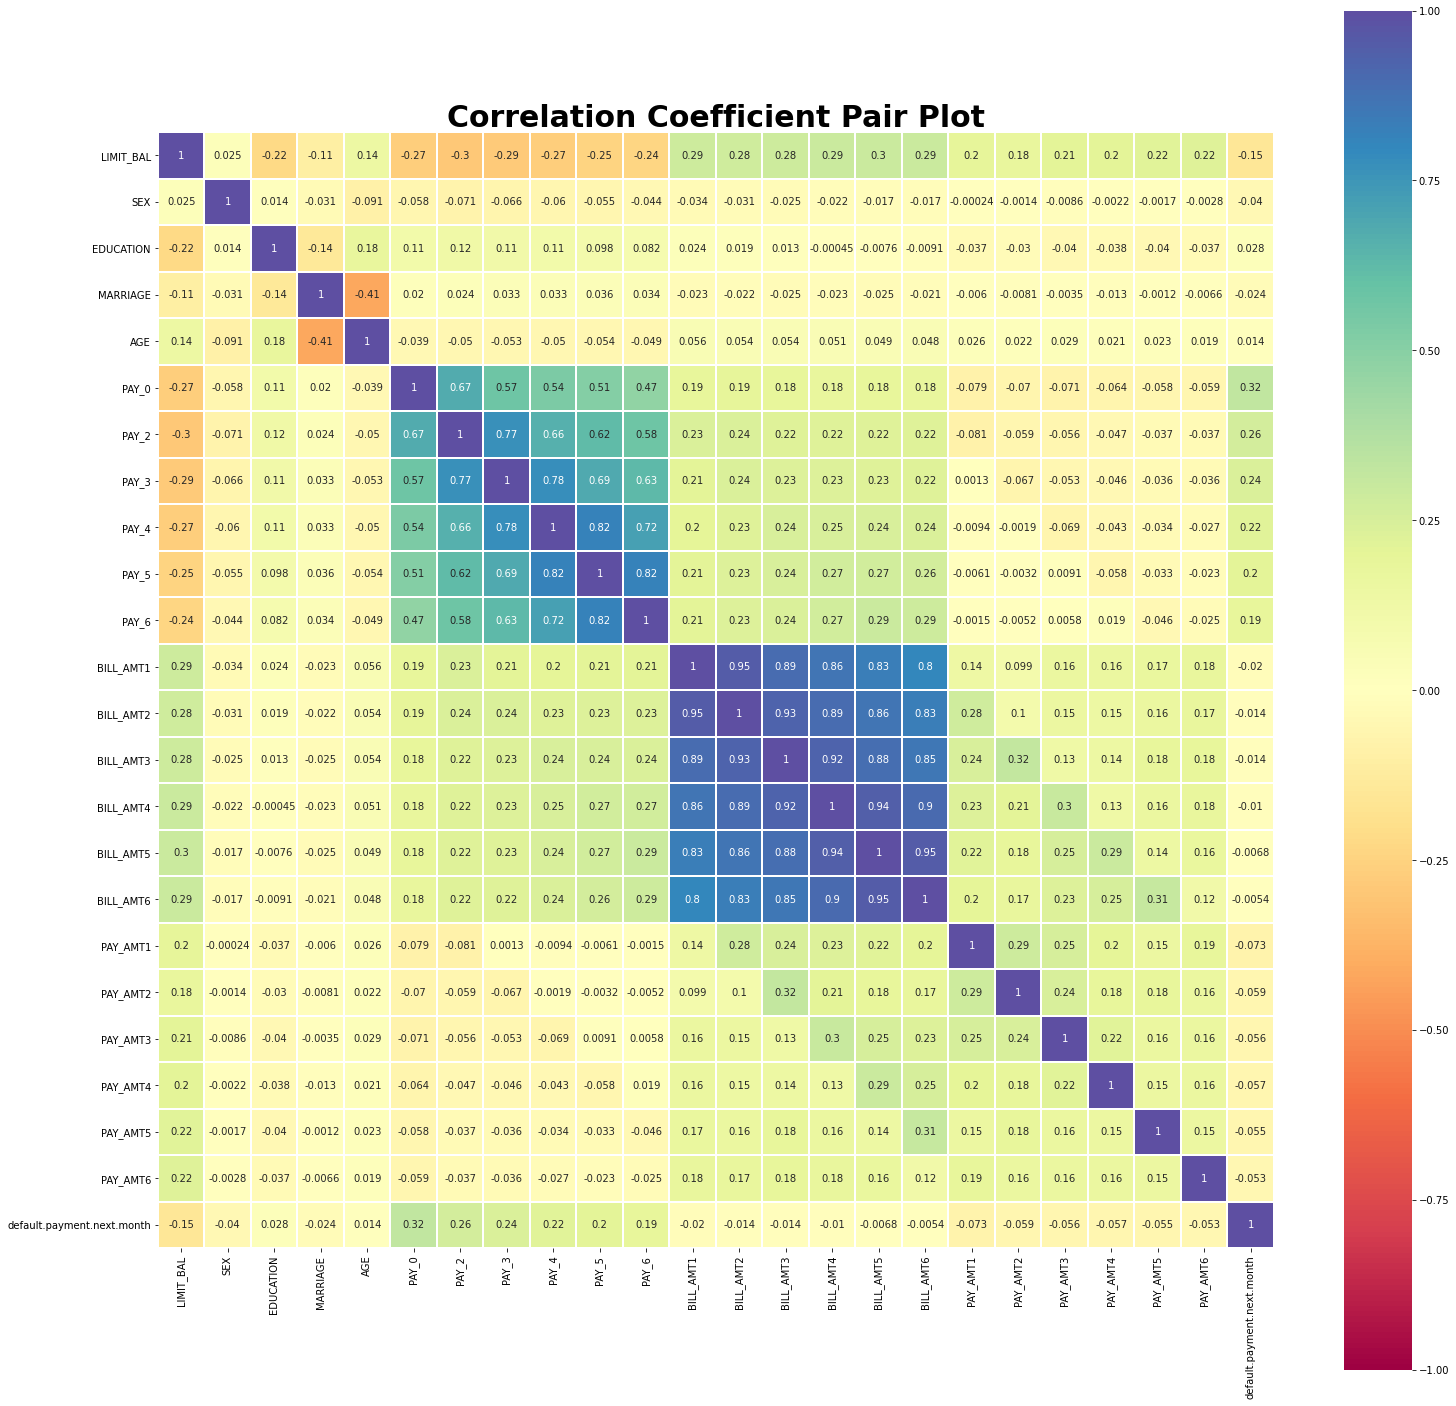

In [17]:
%matplotlib inline
plt.figure(figsize=(25,25))
plt.rcParams['figure.dpi'] = 200
ax = plt.axes()
corr = df.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

<AxesSubplot:title={'center':'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)'}>

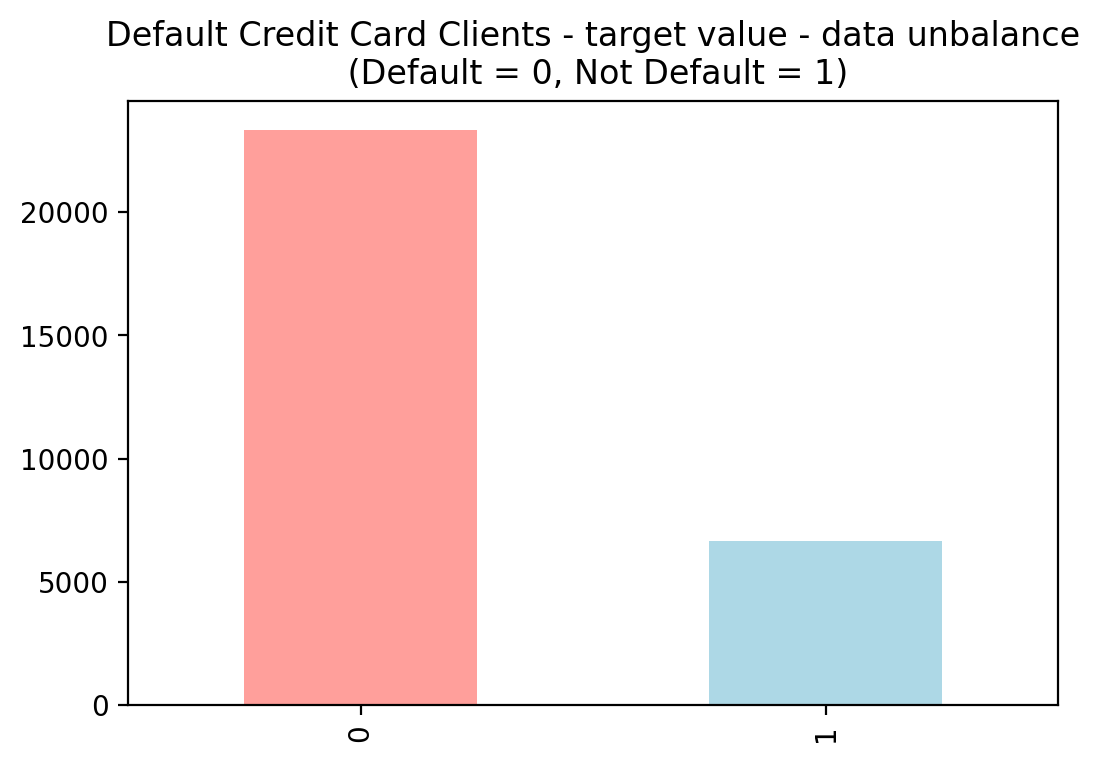

In [31]:
temp = df['default.payment.next.month'].value_counts()
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
temp.plot(kind='bar', color = ['r', 'lightblue'])


In [7]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

X = df.drop('default.payment.next.month', axis=1)
X = StandardScaler().fit_transform(X)

Y = to_categorical(df['default.payment.next.month']) 

In [8]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

In [9]:
# Calculating default Ratio
non_default = len(df[df['default.payment.next.month']==0])
default = len(df[df['default.payment.next.month']==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)

Default Ratio : 0.2212


In [34]:
n_cols = X.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:ratio, 1:1-ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (n_cols,)))
model.add(Dense(25, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X, Y, epochs=20, validation_split=0.3, callbacks = [early_stopping_monitor],class_weight=class_weight)

Epoch 1/20
657/657 [==============================] - 2s 2ms/step - loss: 0.2151 - accuracy: 0.6684 - val_loss: 0.5545 - val_accuracy: 0.7834
Epoch 2/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2047 - accuracy: 0.7546 - val_loss: 0.5641 - val_accuracy: 0.7832
Epoch 3/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.7554 - val_loss: 0.5355 - val_accuracy: 0.7936
Epoch 4/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1993 - accuracy: 0.7570 - val_loss: 0.5655 - val_accuracy: 0.7644
Epoch 5/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.7535 - val_loss: 0.5482 - val_accuracy: 0.7768


In [35]:
optimization = pd.DataFrame()
optimization['Hidden Layer'] = [1,1,1,2,2,3]
optimization['Node per Layer'] = [25,50,100,25,50,25]
optimization['val_loss'] = [0.1874,0.1871,0.1876,0.1861,0.1875,0.1881]

#print(optimization.to_string(index=False))
optimization.head(6)

,Hidden Layer,Node per Layer,val_loss
0,1,25,0.1874
1,1,50,0.1871
2,1,100,0.1876
3,2,25,0.1861
4,2,50,0.1875
5,3,25,0.1881
